In [1]:
import pygrib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from joblib import load

class WeatherPredictor:
    def __init__(self, model_file):
        self.model = load(model_file)
        self.prediction = None
        self.lats = None
        self.lons = None

    def extract_data_and_coords(self, filename):
        with pygrib.open(filename) as grbs:
            grb = grbs.select()[0]
            data = grb.values
            self.lats, self.lons = grb.latlons()
            return data.flatten()

    def make_prediction(self, grib_file):
        X_new = self.extract_data_and_coords(grib_file)
        X_new = X_new.reshape(-1, 1)
        self.prediction = self.model.predict(X_new).reshape(361, 720)

    def output_csv(self, filename='prediction.csv'):
        if self.prediction is None:
            print("No prediction made yet. Call the 'make_prediction' method first.")
        else:
            pd.DataFrame(self.prediction.flatten()).to_csv(filename, index=False)

    def plot_geopotential_height(self):
        if self.prediction is None:
            print("No prediction made yet. Call the 'make_prediction' method first.")
        else:
            # Create a map plot using Cartopy
            fig = plt.figure(figsize=(10, 6))
            ax = plt.axes(projection=ccrs.PlateCarree())
            ax.coastlines()

            # Plot the geopotential height data
            plt.contourf(self.lons, self.lats, self.prediction, cmap='coolwarm')

            # Add colorbar
            cbar = plt.colorbar()
            cbar.set_label('Geopotential Height (gpm)')

            # Set plot title and labels
            plt.title('Predicted Geopotential Height at 500 hPa')
            plt.xlabel('Longitude')
            plt.ylabel('Latitude')

            plt.show()


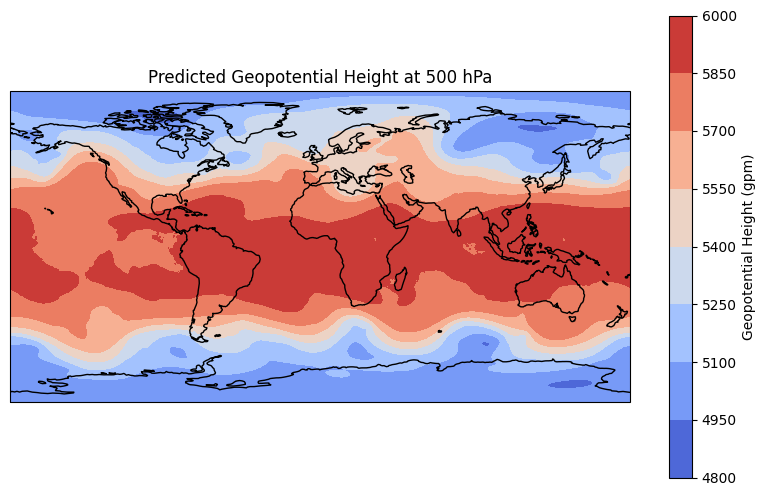

In [3]:
## Example usage: 
predictor = WeatherPredictor('regr_model.joblib')
predictor.make_prediction('new-twelve')
#predictor.output_csv('my_predictions.csv') #outputs CSV with filename as input
predictor.plot_geopotential_height() #plots the prediction 
